In [1]:
import pandas as pd
pd.set_option('float_format', '{:f}'.format)

In [2]:
ratings_1_2 = pd.read_csv('https://raw.githubusercontent.com/nchichilidze/RS-with-GE/main/ratings/data/ratings_1_2.csv')
ratings_3_5 = pd.read_csv('https://raw.githubusercontent.com/nchichilidze/RS-with-GE/main/ratings/data/ratings_3_5.csv')
ratings_6_9 = pd.read_csv('https://raw.githubusercontent.com/nchichilidze/RS-with-GE/main/ratings/data/ratings_6_9.csv')
ratings_10_13 = pd.read_csv('https://raw.githubusercontent.com/nchichilidze/RS-with-GE/main/ratings/data/ratings_10_13.csv')
ratings_14_19 = pd.read_csv('https://raw.githubusercontent.com/nchichilidze/RS-with-GE/main/ratings/data/ratings_14_19.csv')

In [3]:
ratings = ratings_1_2.copy(deep='True')

for col in ratings_3_5.columns: 
  ratings[col] = ratings_3_5[col]

for col in ratings_6_9.columns: 
  ratings[col] = ratings_6_9[col]

for col in ratings_10_13.columns: 
  ratings[col] = ratings_10_13[col]

for col in ratings_14_19.columns: 
  ratings[col] = ratings_14_19[col]

In [4]:
ratings.head()

,user_id,movie_id,rating,CBF,CF,is_favourite_genre,ML_rating,ML_votes,age_at_rating,age_at_release,...,imdb_rating,imdb_votes,is_adult,runtime_minutes,is_english,budget,popularity,TMDB_rating,TMDB_votes,revenue
0,1,1193,5,0,4,1,4,1725,1,-24,...,8,975363,0,133,1,3000000,27,8,8435,108981275
1,1,661,3,0,3,1,3,525,1,-3,...,6,65304,0,79,1,38000000,22,6,1035,28946127
2,1,914,3,0,4,0,4,636,1,-35,...,7,93493,0,170,1,17000000,19,7,988,72661442
3,1,3408,4,0,4,1,3,1315,1,1,...,7,191717,0,131,1,52000000,17,7,2451,256271286
4,1,2355,5,0,4,1,3,1703,1,-1,...,7,283979,0,95,1,120000000,81,7,7552,363258859


In [5]:
ratings.shape

(1000209, 22)

In [6]:
y_col_name = 'rating'

for column in ratings.columns: 
  ratings = ratings.astype({column: 'float'})

ratings = ratings.astype({y_col_name: 'int'})

ratings.dtypes

user_id               float64
movie_id              float64
rating                  int64
CBF                   float64
CF                    float64
is_favourite_genre    float64
ML_rating             float64
ML_votes              float64
age_at_rating         float64
age_at_release        float64
born_before           float64
gender                float64
imdb_rating           float64
imdb_votes            float64
is_adult              float64
runtime_minutes       float64
is_english            float64
budget                float64
popularity            float64
TMDB_rating           float64
TMDB_votes            float64
revenue               float64
dtype: object

In [7]:
ratings.columns

Index(['user_id', 'movie_id', 'rating', 'CBF', 'CF', 'is_favourite_genre',
       'ML_rating', 'ML_votes', 'age_at_rating', 'age_at_release',
       'born_before', 'gender', 'imdb_rating', 'imdb_votes', 'is_adult',
       'runtime_minutes', 'is_english', 'budget', 'popularity', 'TMDB_rating',
       'TMDB_votes', 'revenue'],
      dtype='object')

In [8]:
ratings = ratings.drop(columns=['user_id', 'movie_id'])

In [9]:
columns = ['CBF', 'CF', 'is_favourite_genre',
       'ML_rating', 'ML_votes', 'age_at_rating', 'age_at_release',
       'born_before', 'gender', 'imdb_rating', 'imdb_votes', 'is_adult',
       'runtime_minutes', 'is_english', 'budget', 'popularity', 'TMDB_rating',
       'TMDB_votes', 'revenue'] 

index = 1
for col in columns: 
  new_name = 'x' + str(index)
  ratings = ratings.rename(columns={col: 'x' + str(index)})
  print(col + ' : ' + new_name)
  index += 1

ratings = ratings.rename(columns={'rating': 'y'})

CBF : x1
CF : x2
is_favourite_genre : x3
ML_rating : x4
ML_votes : x5
age_at_rating : x6
age_at_release : x7
born_before : x8
gender : x9
imdb_rating : x10
imdb_votes : x11
is_adult : x12
runtime_minutes : x13
is_english : x14
budget : x15
popularity : x16
TMDB_rating : x17
TMDB_votes : x18
revenue : x19


In [10]:
data = ratings.copy(deep=True)

In [11]:
# maximum absolute scaling [-1, 1]
cols = list(set(ratings.columns) - set(['y'])) 

for col in cols:
  data[col]=(data[col]-data[col].min())/(data[col].max()-data[col].min())

  
data.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
count,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000,1000209.000000
mean,3.581564,0.018058,0.521309,0.822273,0.521223,0.237886,0.522515,0.704752,0.868269,0.246389,0.669896,0.086882,0.491264,0.373634,0.961149,0.116028,0.089831,0.642742,0.115070,0.050175
std,1.117102,0.133162,0.203457,0.382283,0.158440,0.193400,0.213672,0.126661,0.338199,0.430908,0.138175,0.134412,0.065617,0.080537,0.193240,0.145856,0.083533,0.107578,0.167067,0.079931
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.500000,1.000000,0.500000,0.091625,0.436364,0.649254,1.000000,0.000000,0.571429,0.013192,0.500000,0.322034,1.000000,0.008000,0.044944,0.600000,0.016172,0.003520
50%,4.000000,0.000000,0.500000,1.000000,0.500000,0.187919,0.436364,0.716418,1.000000,0.000000,0.714286,0.036772,0.500000,0.362712,1.000000,0.065000,0.067416,0.700000,0.046447,0.019050
75%,4.000000,0.000000,0.750000,1.000000,0.500000,0.327692,0.618182,0.768657,1.000000,0.000000,0.714286,0.093643,0.500000,0.413559,1.000000,0.160000,0.104869,0.700000,0.138580,0.063329
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# rearrange columns 
data = data[[ 'x1',	'x2',	'x3',	'x4'	,'x5',	'x6',	'x7',	'x8',	'x9',	'x10',	'x11',	'x12',	'x13'	,'x14',	'x15'	,'x16',	'x17',	'x18', 'x19', 'y']]
data.head()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,y
0,0.000000,0.750000,1.000000,0.750000,0.503064,0.000000,0.402985,0.000000,1.000000,0.857143,0.381855,0.500000,0.440678,1.000000,0.015000,0.101124,0.800000,0.356163,0.049821,5
1,0.000000,0.500000,1.000000,0.500000,0.152903,0.000000,0.559701,0.000000,1.000000,0.571429,0.025563,0.500000,0.257627,1.000000,0.190000,0.082397,0.600000,0.043702,0.013233,3
2,0.000000,0.750000,0.000000,0.750000,0.185293,0.000000,0.320896,0.000000,1.000000,0.714286,0.036599,0.500000,0.566102,1.000000,0.085000,0.071161,0.700000,0.041718,0.033217,3
3,0.000000,0.750000,1.000000,0.500000,0.383426,0.000000,0.589552,1.000000,1.000000,0.714286,0.075054,0.500000,0.433898,1.000000,0.260000,0.063670,0.700000,0.103492,0.117155,4
4,0.000000,0.750000,1.000000,0.500000,0.496644,0.000000,0.574627,0.000000,1.000000,0.714286,0.111175,0.500000,0.311864,1.000000,0.600000,0.303371,0.700000,0.318879,0.166064,5


## GE

In [13]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# import os.path

# PATH = '/content/drive/MyDrive/grape/'
# if os.path.exists(PATH):
#     print('grape directory already exists')
# else:
#     %cd /content/drive/MyDrive/
!git clone https://github.com/UL-BDS/grape.git 
print('Cloning grape in your Drive')


fatal: destination path 'grape' already exists and is not an empty directory.
Cloning grape in your Drive


In [14]:

%cd grape/

# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

!pip3 install deap==1.3 

from ponyge2_adapted_files import Grammar, ge
from functions import div, plog, psqrt, exp
from functions import add, sub, mul, pdiv, neg, and_, or_, not_, less_than_or_equal, greater_than_or_equal
import algorithms

from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from deap import creator, base, tools
from sklearn.model_selection import train_test_split

/Users/nutsa/Desktop/RS-with-GE/grape
You should consider upgrading via the 'pip install --upgrade pip' command.


In [15]:
data_train, data_test = train_test_split(data, test_size = 0.2)

print('train ' + str(data_train.shape))
print('test ' + str(data_test.shape))

train (800167, 20)
test (200042, 20)


In [16]:
train_rows = len(data_train)
test_rows = len(data_test)

cols = len(data_train.columns)

print(train_rows)
print(test_rows)
print(cols)

800167
200042
20


In [17]:
X_train = np.zeros([cols, train_rows], dtype=float)
Y_train = np.zeros([train_rows, ], dtype = float)

for i in range(cols-1): 
  for j in range(train_rows): 
    X_train[i,j] = data_train['x' + str(i+1)].iloc[j]
  
for i in range(train_rows):
  Y_train[i] = data_train['y'].iloc[i]

In [18]:
X_test = np.zeros([cols, test_rows], dtype=float)
Y_test = np.zeros([test_rows, ], dtype=float)

for i in range(cols-1): 
  for j in range(test_rows): 
    X_test[i,j] = data_test['x' + str(i+1)].iloc[j]
  
for i in range(test_rows):
  Y_test[i] = data_test['y'].iloc[i]

In [19]:
def fitness_eval(individual, points):
    x = points[0]
    y = points[1]
    
    if individual.invalid == True:
        return np.NaN,

    try:
        pred = eval(individual.phenotype)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError, ValueError):
        return np.NaN,
    assert np.isrealobj(pred)
    
    try:
        fitness = np.sqrt(np.mean((pred-y)**2))
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError, ValueError):
        fitness = np.NaN
        
    if fitness == float("inf"):
      return np.NaN,    
    return fitness,

In [23]:
GRAMMAR_FILE = 'rs-grammar.bnf'
f = open("grammars/" + GRAMMAR_FILE, "r")
print(f.read())
f.close() 

BNF_GRAMMAR = Grammar(path.join("grammars", GRAMMAR_FILE))

<e>   ::= <e>+<e>|<e>-<e>|<e>*<e>|div(<e>,<e>)|psqrt(<e>)|np.sin(<e>)|np.tanh(<e>)|exp(<e>)|plog(<e>)|x[1]|x[2]|x[3]|x[4]|x[5]|x[6]|x[7]|x[8]|x[9]|x[10]|x[11]|x[12]|x[13]|x[14]|x[15]|x[16]|x[17]|x[18]|x[19]|<c><c>.<c><c>
<c>  ::= 0 | 1 | 2 | 3 | 4 | 5



In [24]:
toolbox = base.Toolbox()

# define a single objective, minimising fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create('Individual', ge.Individual, fitness=creator.FitnessMin)

toolbox.register("populationCreator", ge.initialisation_PI_Grow, creator.Individual) 

toolbox.register("evaluate", fitness_eval)

# Tournament selection:
toolbox.register("select", ge.selTournament, tournsize=7)

# Single-point crossover:
toolbox.register("mate", ge.crossover_onepoint)

# Flip-int mutation:
toolbox.register("mutate", ge.mutation_int_flip_per_codon)

POPULATION_SIZE = 1000
MAX_GENERATIONS = 250
P_CROSSOVER = 1
P_MUTATION = 0.5
ELITE_SIZE = round(0.01*POPULATION_SIZE)

HALL_OF_FAME_SIZE = 1
MAX_INIT_TREE_DEPTH = 10
MIN_INIT_TREE_DEPTH = 1
MAX_TREE_DEPTH = 17
MAX_WRAPS = 0
CODON_SIZE = 225

In [25]:
population = toolbox.populationCreator(size=POPULATION_SIZE, 
                                        bnf_grammar=BNF_GRAMMAR, 
                                        min_init_tree_depth=MIN_INIT_TREE_DEPTH,
                                        max_init_tree_depth=MAX_INIT_TREE_DEPTH,
                                        max_tree_depth=MAX_TREE_DEPTH, 
                                        max_wraps=MAX_WRAPS,
                                        codon_size=CODON_SIZE
                                        )


hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)

population, logbook = algorithms.ge_eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                          bnf_grammar=BNF_GRAMMAR, codon_size=CODON_SIZE, 
                                          max_tree_depth=MAX_TREE_DEPTH, max_wraps=MAX_WRAPS,
                                          points_train=[X_train, Y_train], 
                                          points_test=[X_test, Y_test], 
                                          stats=stats, halloffame=hof, verbose=True)

gen	invalid	avg    	std    	min    	max    	fitness_test	best_ind_length	avg_length	max_length	selection_time	generation_time
0  	0      	7.50078	69.3746	1.41201	1368.24	1.41094     	13             	19.84     	102       	0             	13.5496        
1  	66     	1.16137e+16	3.02181e+17	1.13837	7.87412e+18	1.13788     	12             	19.638    	86        	0.0132532     	7.62478        
2  	29     	1.12496e+19	3.14588e+20	1.1061 	8.80846e+21	1.10619     	11             	20.075    	85        	0.011436      	5.57338        
3  	25     	3.89576    	4.61375    	1.1061 	50.8504    	1.10619     	11             	20.236    	91        	0.013382      	4.91713        
4  	14     	2.48718e+11	7.30232e+12	1.1061 	2.14644e+14	1.10619     	11             	19.757    	68        	0.0144322     	4.66013        
5  	23     	1.37918e+21	4.07734e+22	1.1061 	1.20678e+24	1.10619     	11             	20.866    	68        	0.0145462     	4.28096        
6  	15     	5.46679e+19	1.62263e+21	1.1061 	4.82171e+22	1.

In [26]:
max_fitness_values, mean_fitness_values = logbook.select("max", "avg")
min_fitness_values, std_fitness_values = logbook.select("min", "std")
fitness_test = logbook.select("fitness_test")
best_ind_length = logbook.select("best_ind_length")
avg_length = logbook.select("avg_length")
max_length = logbook.select("max_length")
selection_time = logbook.select("selection_time")
generation_time = logbook.select("generation_time")
gen, invalid = logbook.select("gen", "invalid")

header = ['gen', 'invalid', 'avg', 'std', 'min', 'max', 'fitness_test', 'best_ind_length', 'avg_length', 'max_length', 'selection_time', 'generation_time']

results = pd.DataFrame(list(zip(gen, invalid, mean_fitness_values, std_fitness_values, min_fitness_values, max_fitness_values, fitness_test, best_ind_length, avg_length, max_length, selection_time, generation_time)),
               columns = header)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')

display(results)

,gen,invalid,avg,std,min,max,fitness_test,best_ind_length,avg_length,max_length,selection_time,generation_time
0,0,0,7.500776,69.374575,1.412012,1368.237495,1.410939,13,19.840000,102,0.000000,13.549561
1,1,66,11613746816280306.000000,302180675972623104.000000,1.138373,7874120341438045184.000000,1.137883,12,19.638000,86,0.013253,7.624779
2,2,29,11249634397432717312.000000,314587733911153737728.000000,1.106100,8808463733189816352768.000000,1.106190,11,20.075000,85,0.011436,5.573381
3,3,25,3.895761,4.613745,1.106100,50.850412,1.106190,11,20.236000,91,0.013382,4.917126
4,4,14,248717937183.748474,7302317973143.838867,1.106100,214643579785912.312500,1.106190,11,19.757000,68,0.014432,4.660129
5,5,23,1379180056691708526592.000000,40773377190887073775616.000000,1.106100,1206782549605245064839168.000000,1.106190,11,20.866000,68,0.014546,4.280959
6,6,15,54667876505008799744.000000,1622632457366865707008.000000,1.106100,48217067077417763340288.000000,1.106190,11,21.428000,70,0.012293,4.367890
7,7,17,82308804071218675712.000000,1823396446130879070208.000000,1.102203,48701656657854587731968.000000,1.102929,27,22.463000,73,0.011966,4.625484
8,8,15,4.897416,7.605480,1.102203,51.570240,1.102929,27,22.104000,70,0.013358,4.353074
9,9,12,5649.064917,165815.813475,1.102203,4876797.271411,1.102929,27,22.251000,74,0.012404,4.469148


In [29]:
import textwrap
best = hof.items[0].phenotype
print("Best individual: \n","\n".join(textwrap.wrap(best,80)))
print("\nTraining Fitness: ", hof.items[0].fitness.values[0])
print("Test Fitness: ", fitness_eval(hof.items[0], [X_test,Y_test])[0])
print("Depth: ", hof.items[0].depth)
print("Length of the genome: ", len(hof.items[0].genome))
print(f'Used portion of the genome: {hof.items[0].used_codons/len(hof.items[0].genome):.2f}')

Best individual: 
 psqrt(24.55*x[1])

Training Fitness:  0.7811908044024153
Test Fitness:  0.7826395227083869
Depth:  5
Length of the genome:  55
Used portion of the genome: 0.15


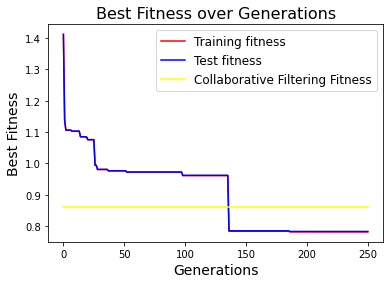

In [27]:
# Extract statistics to plot graphs:

collaborative_filtering = [] 
for i in range(len(min_fitness_values)): 
  collaborative_filtering.append(0.86)

plt.plot(gen, min_fitness_values, color='red', label="Training fitness")
plt.plot(gen, fitness_test, color='blue', label="Test fitness")
plt.plot(gen, collaborative_filtering , color='yellow', label="Collaborative Filtering Fitness")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Best Fitness', fontsize=14)
plt.title('Best Fitness over Generations', fontsize=16)
plt.show()

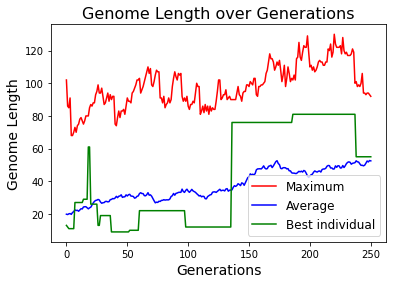

In [28]:
plt.plot(gen, max_length, color='red', label="Maximum")
plt.plot(gen, avg_length, color='blue', label="Average")
plt.plot(gen, best_ind_length, color='green', label="Best individual")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Genome Length', fontsize=14)
plt.title('Genome Length over Generations', fontsize=16)
plt.show()

In [ ]:
# check correctness 


In [ ]:
#  add(add(x[1],sub(add(add(x[9],add(x[4],x[1])),x[13]),x[9])),add(x[6],x[1]))

# 3 * x[1] + x[13] + x[4] + x[6]

data_check = data_test.copy(deep=True)
# pred = 3 * data_check['x1'] + data_check['x13'] + data_check['x4'] + data_check['x6'] 
pred = 3 * data_check['x2'] + data_check['x14'] + data_check['x5'] + data_check['x7'] 
y = data_check['y']
rmse = np.sqrt(np.mean((pred-y)**2))
print(rmse)

0.8301901289547063


In [ ]:
# add(pdiv(x[13] /x[13]),mul(x[1],04.85))

# x[13]/x[13] + x[1] * 4.85

pdiv(0, 0)

# 1 + CF * 4.85

1.0

In [ ]:
# CBF : x1
# CF : x2
# is_favourite_genre : x3
# ML_rating : x4
# ML_votes : x5
# age_at_rating : x6
# age_at_release : x7
# born_before : x8
# gender : x9
# imdb_rating : x10
# imdb_votes : x11
# is_adult : x12
# runtime_minutes : x13
# is_english : x14
# budget : x15
# popularity : x16
# TMDB_rating : x17
# TMDB_votes : x18
# revenue : x19
